## <center> Multiple Linear Regression

#### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import klib as k

#### Loading the dataset

In [2]:
data=pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.shape

(500, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
k.clean.clean_column_names(data=data)

,serial_no,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [10]:
data.drop(columns='serial_no',inplace=True)
data

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


### Explaratory data analysis
#### Univariate analysis
##### Histogram

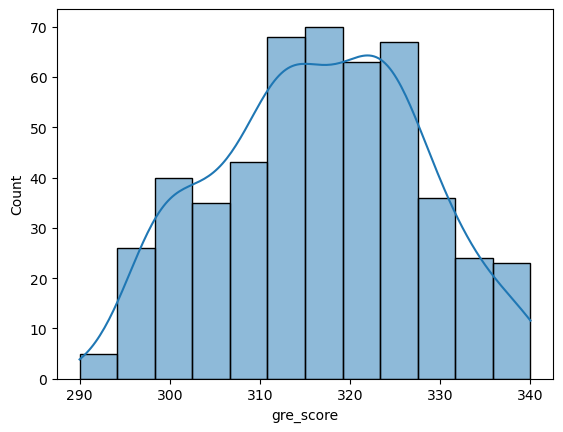

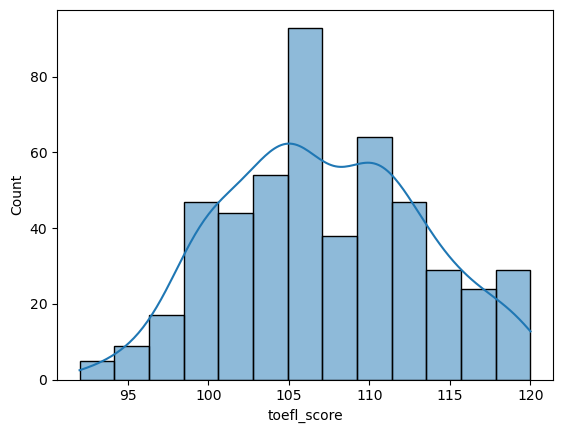

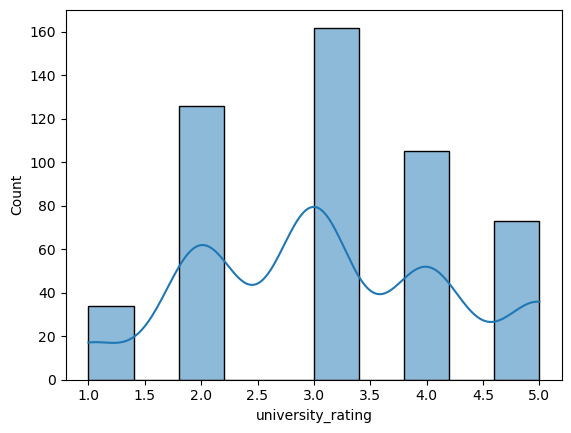

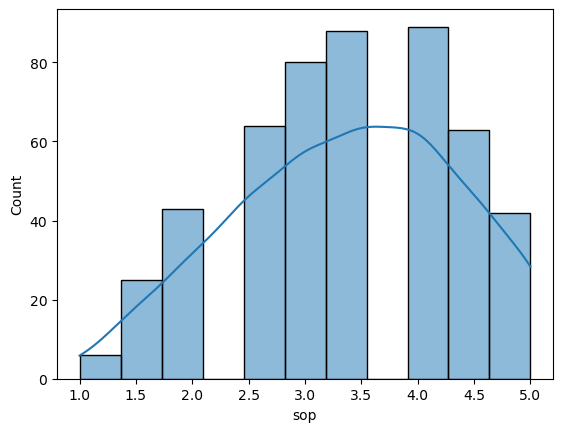

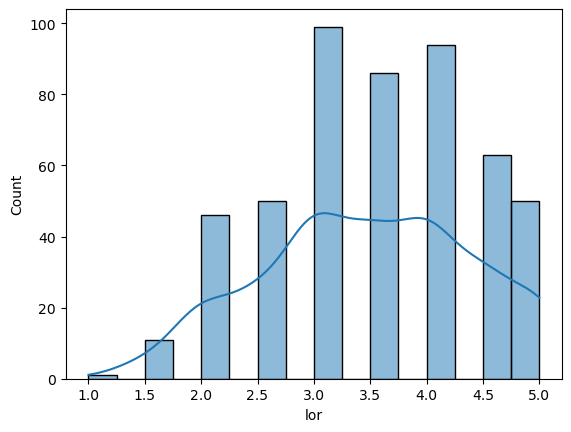

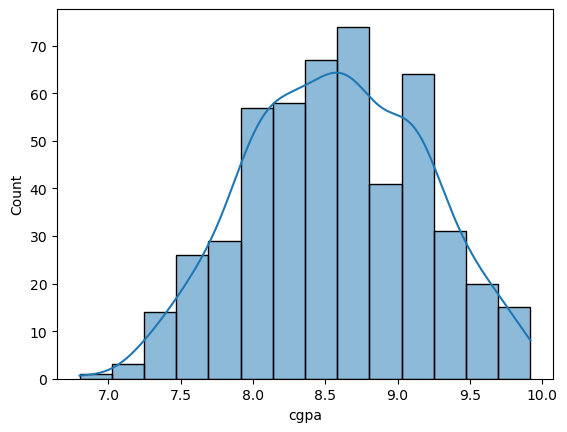

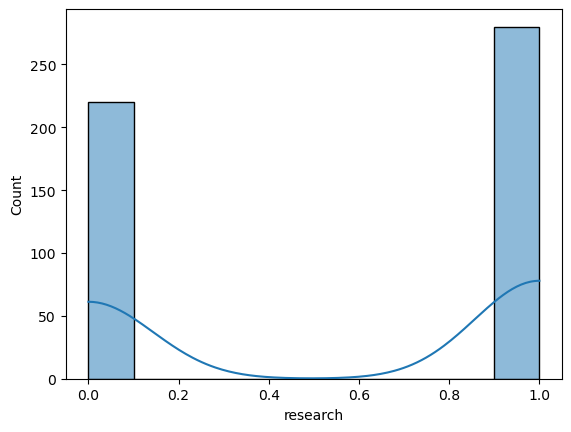

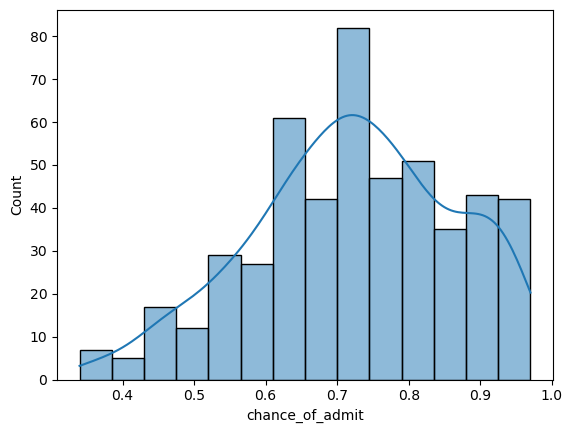

In [11]:
for i in data.columns:
    sns.histplot(x=data[i],kde=True)
    plt.show()

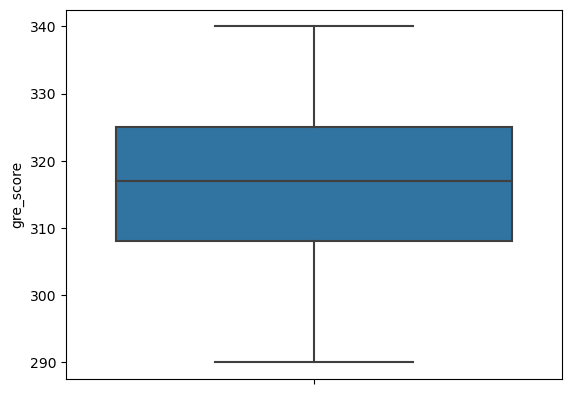

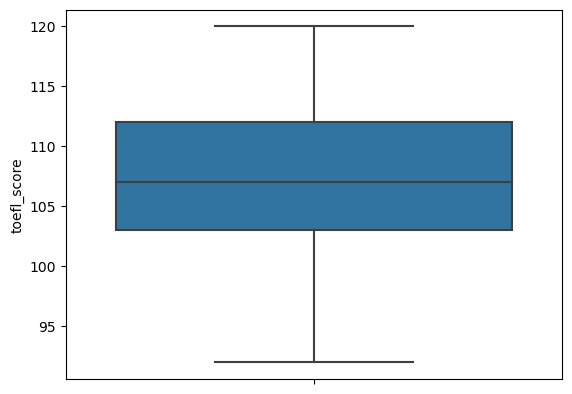

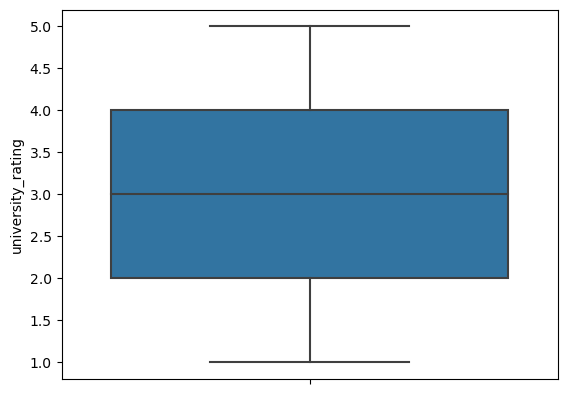

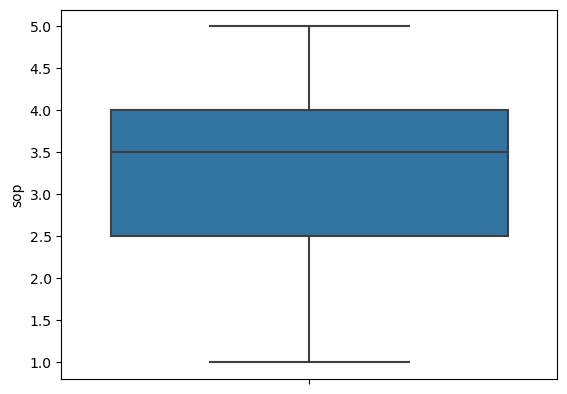

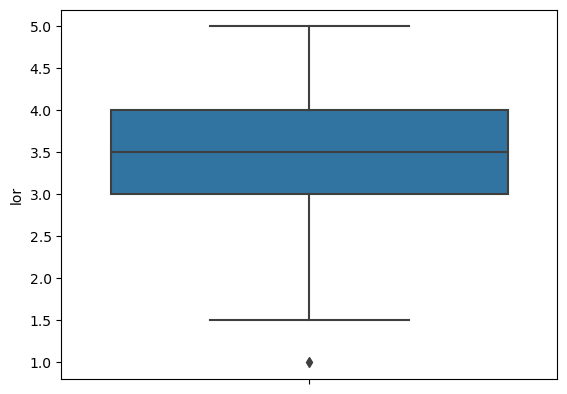

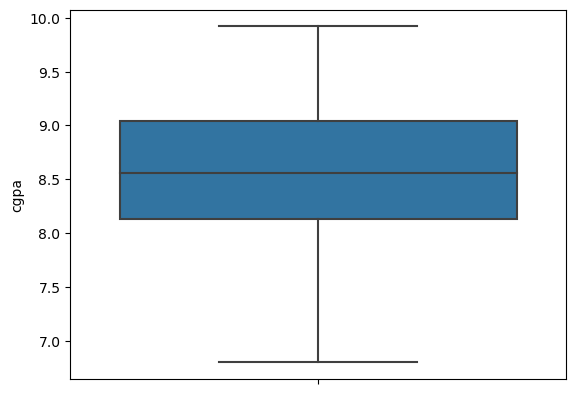

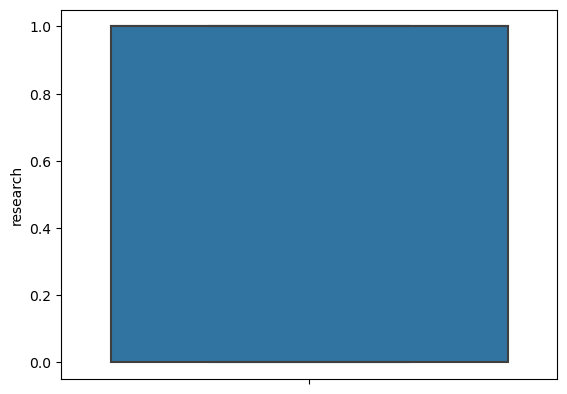

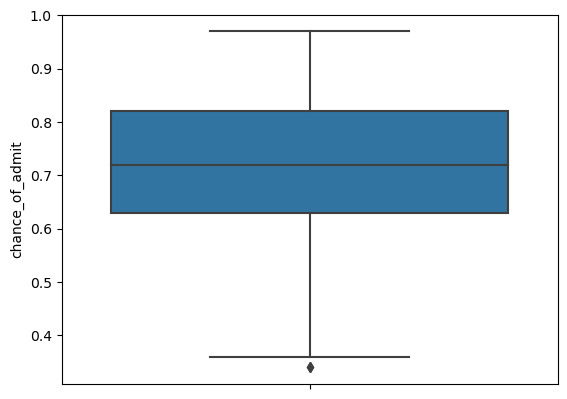

In [12]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

### Multivariate analysis
#### Scatter plot

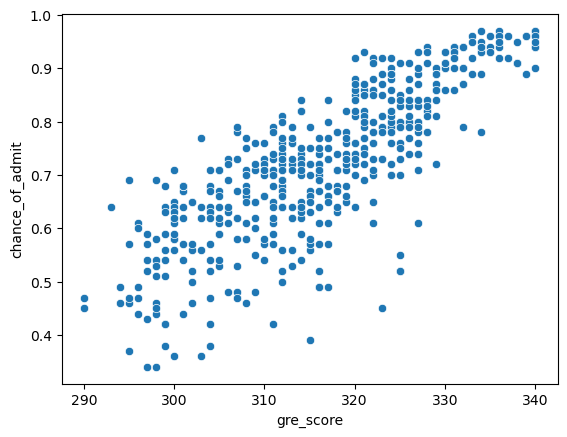

In [13]:
sns.scatterplot(data=data,x='gre_score',y='chance_of_admit')
plt.show()

#### Heat map

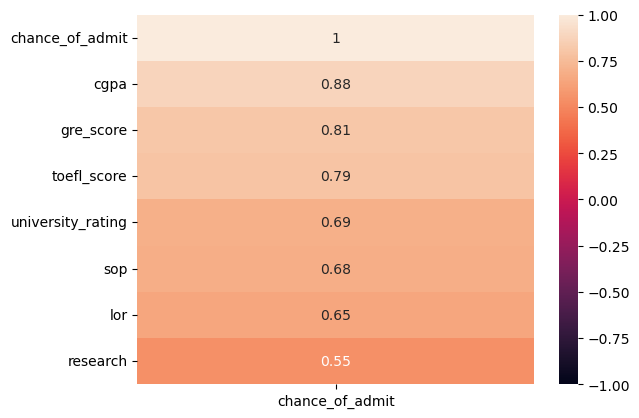

In [14]:
sns.heatmap(data.corr()[['chance_of_admit']].sort_values(by='chance_of_admit',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

#### Selecting features and Targets

In [15]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#### Feature scaling
##### Initialising Standard Scaler

In [16]:
sc = StandardScaler()

In [17]:
x= sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Model building
#### Creating dictionary of models for iterative purpose

In [19]:
models = {'LinearRegression':LinearRegression(),
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'LinearSVR':LinearSVR(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'RandomForestRegressor':RandomForestRegressor(random_state=0)}

#### Using a for loop for model training and testing

In [21]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score = r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print("*"*100)

model trained with LinearRegression
r2score: 81.88432567829629
training_score: 82.10671369321554
testing_score: 81.88432567829629
mae: 0.042722654277053664
mse: 0.00370465539878841
rmse_test: 0.060865880415783113
****************************************************************************************************
model trained with Ridge
r2score: 81.87987385531805
training_score: 82.1063070662641
testing_score: 81.87987385531805
mae: 0.04274636477332952
mse: 0.0037055657965874593
rmse_test: 0.06087335867674347
****************************************************************************************************
model trained with Lasso
r2score: -0.724844132029312
training_score: 0.0
testing_score: -0.724844132029312
mae: 0.116268
mse: 0.020598230624999995
rmse_test: 0.1435208369018241
****************************************************************************************************
model trained with LinearSVR
r2score: 81.48289689479954
training_score: 81.19512154220908
testing_score: 8